In [1]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

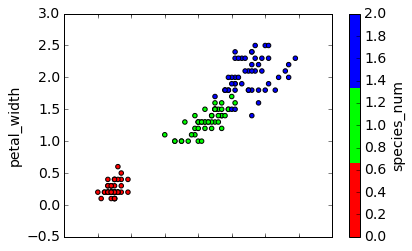

In [5]:
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold)

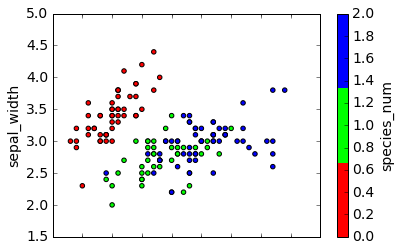

In [6]:
# create a scatter plot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold)


In [9]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]

In [11]:
# alternative ways to create "X"
X = iris.drop(['species', 'species_num'], axis=1)

In [12]:
y = iris.species_num

In [13]:
print X.shape

(150, 4)


In [14]:
print y.shape

(150,)


In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [18]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT4-students/master/kerry/Final/NBA_players_2015.csv'
nba = pd.read_csv(url, index_col=0)

In [19]:
nba.head()

,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,fga,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,...,15.1,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3
1,2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,...,15.9,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0
2,2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,...,19.2,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6
3,2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,2.6,...,12.9,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0
4,2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,11.8,...,10.9,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2


In [20]:
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [21]:
y=nba.pos_num
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]

In [22]:
def min_max(nums):
    smallest = min(nums)
    largest = max(nums)
    return [smallest, largest]

In [23]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [27]:
from sklearn import metrics



In [32]:
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.691666666667


In [33]:

# calculate TRAINING ERROR and TESTING ERROR for K=1 through 100

k_range = range(1, 101)
training_error = []
testing_error = []

for k in k_range:

    # instantiate the model with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # calculate training error
    knn.fit(X, y)
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # calculate testing error
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [34]:

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [35]:

# create a DataFrame of K, training error, and testing error
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

,testing error,training error
K,,
100,0.375000,0.351464
99,0.383333,0.347280
98,0.375000,0.345188
97,0.375000,0.347280
96,0.375000,0.345188


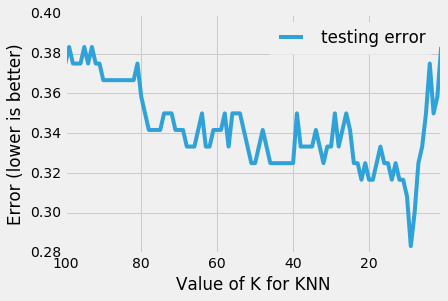

In [36]:
df.plot(y='testing error')
plt.xlabel('Value of K for KNN')
plt.ylabel('Error (lower is better)')

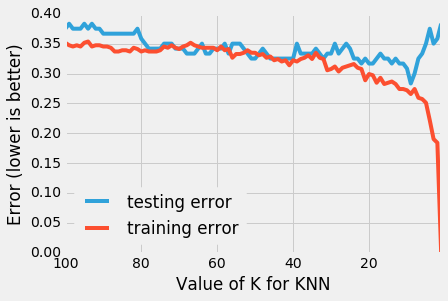

In [37]:
df.plot()
plt.xlabel('Value of K for KNN')
plt.ylabel('Error (lower is better)')